## Data and six questions
This week's data comes from the World Bank (https://worldbank.org), which lends money to countries that want to invest in infrastructure and education. The data is from the World Bank's page for educational data, at:

https://data.worldbank.org/topic/education
To get the data, click on the "CSV" link on that page, or use the following link instead:

https://api.worldbank.org/v2/en/topic/4?downloadformat=csv
This will download a zipfile containing three CSV files to your computer. We'll use those files to answer a number of education-related questions. The files are:

The data itself
Metadata about the indicators
Metadata about the countries
The filenames are all very long, but you can readily identify the metadata-related files, because their names start with the word "Metadata". The third file, whose name starts with API_4, contains the main data.

This week's learning goals include joins, grouping plotting, and filtering columns and rows.

Here are my six questions and tasks for this week. I'll be back tomorrow with my complete answers, as well as a downloadable Jupyter notebook with my solutions:

- Import the main file into a data frame. Set its index to be the "Country Code" column, drop the "Unnamed: 68" column, and keep only those rows where "Indicator Code" starts with "SE.".
- Import the two metadata files into data frames, and join them together with the main data frame. Remove any columns that start with the word "Unnamed". Then make the country code into the index.
- What 10 countries had, in 2022, the highest percentage of female bachelor's degree or better?
- In 2022, what countries had the highest literacy rate for adult males and females? The lowest?
- For each region of the world, calculate the mean "Educational attainment, at least completed upper secondary, population 25+, total (%)", with a code of SE.SEC.CUAT.UP.ZS. Which region has had the greatest percentage improvement between 2002 and 2012, and 2012 and 2022? If the Region is NaN, then that means the row itself refers to a region, and can be excluded. Did any regions go down?
- Create a line plot showing, for each year, the mean government expenditure on education for each income group, as a percentage of GDP (SE.XPD.TOTL.GD.ZS). The years should form the x axis, and the expense the y axis. What directions do we see for rich countries vs. poor countries?



In [194]:
import pandas as pd
from IPython.display import display

data_df = (
    pd.read_csv('data/Data.csv', skiprows=4)
      .drop('Unnamed: 68', axis='columns').query('`Indicator Code`.str.startswith("SE")')
)
data_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
15,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.850840,5.88783,5.49106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.617979,23.20138,21.85375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Aruba,ABW,Expenditure on tertiary education (% of govern...,SE.XPD.TERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.021530,25.09833,18.39152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Aruba,ABW,"Government expenditure per student, tertiary (...",SE.XPD.TERT.PC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,103.682730,145.57715,100.24176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Aruba,ABW,Expenditure on secondary education (% of gover...,SE.XPD.SECO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,34.430690,30.67691,33.24558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43619,Zimbabwe,ZWE,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.283829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.199997,NaN
43620,Zimbabwe,ZWE,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,90.428123,NaN,NaN,NaN,NaN,83.720001,NaN,NaN,90.860001,NaN
43621,Zimbabwe,ZWE,"Literacy rate, youth male (% of males ages 15-24)",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.591858,NaN,NaN,NaN,NaN,78.370003,NaN,NaN,86.750000,NaN
43622,Zimbabwe,ZWE,"Literacy rate, youth (ages 15-24), gender pari...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.060060,NaN,NaN,NaN,NaN,1.117952,NaN,NaN,1.083950,NaN


In [195]:

country_meta_df = pd.read_csv('data/Metadata_Country.csv', index_col='Country Code').drop('Unnamed: 5', axis=1)

In [196]:

indicator_meta_df = pd.read_csv('data/Metadata_Indicator.csv').drop('Unnamed: 4', axis=1)
indicator_meta_df

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.POP.1564.TO.ZS,Population ages 15-64 (% of total population),Total population between the ages 15 to 64 as ...,United Nations Population Division. World Popu...
1,SP.POP.0014.TO.ZS,Population ages 0-14 (% of total population),Population between the ages 0 to 14 as a perce...,United Nations Population Division. World Popu...
2,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",Unemployment refers to the share of the labor ...,International Labour Organization. “ILO Modell...
3,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (mo...",Unemployment refers to the share of the labor ...,International Labour Organization. “ILO Modell...
4,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)...",Unemployment refers to the share of the labor ...,International Labour Organization. “ILO Modell...
...,...,...,...,...
159,SE.ADT.LITR.FE.ZS,"Literacy rate, adult female (% of females ages...",Adult literacy rate is the percentage of peopl...,UNESCO Institute for Statistics (UIS). UIS.Sta...
160,SE.ADT.1524.LT.ZS,"Literacy rate, youth total (% of people ages 1...",Youth literacy rate is the percentage of peopl...,UNESCO Institute for Statistics (UIS). UIS.Sta...
161,SE.ADT.1524.LT.MA.ZS,"Literacy rate, youth male (% of males ages 15-24)",Youth literacy rate is the percentage of peopl...,UNESCO Institute for Statistics (UIS). UIS.Sta...
162,SE.ADT.1524.LT.FM.ZS,"Literacy rate, youth (ages 15-24), gender pari...",Gender parity index for youth literacy rate is...,UNESCO Institute for Statistics (UIS). UIS.Sta...


In [197]:
data_indicator_merge = (
    data_df.merge(indicator_meta_df, left_on='Indicator Code',
                  right_on='INDICATOR_CODE', how='left')
)
data_indicator_country_merge = (
    data_indicator_merge.merge(country_meta_df, on='Country Code',
                               how='left').dropna(axis='index', subset='Region')
)
data_indicator_country_merge = data_indicator_country_merge.set_index(['Country Code', 'Indicator Code'])
data_indicator_country_merge


Country Name  \
Country Code Indicator Code                      
ABW          SE.XPD.TOTL.GD.ZS           Aruba   
             SE.XPD.TOTL.GB.ZS           Aruba   
             SE.XPD.TERT.ZS              Aruba   
             SE.XPD.TERT.PC.ZS           Aruba   
             SE.XPD.SECO.ZS              Aruba   
...                                        ...   
ZWE          SE.ADT.LITR.FE.ZS        Zimbabwe   
             SE.ADT.1524.LT.ZS        Zimbabwe   
             SE.ADT.1524.LT.MA.ZS     Zimbabwe   
             SE.ADT.1524.LT.FM.ZS     Zimbabwe   
             SE.ADT.1524.LT.FE.ZS     Zimbabwe   

                                                                      Indicator Name  \
Country Code Indicator Code                                                            
ABW          SE.XPD.TOTL.GD.ZS     Government expenditure on education, total (% ...   
             SE.XPD.TOTL.GB.ZS     Government expenditure on education, total (% ...   
             SE.XPD.TERT.ZS        Expenditure on tertiary education (% of govern...   
             SE.XPD.TERT.PC.ZS     Government expenditure per student, tertiary (...   
             SE.XPD.SECO.ZS        Expenditure on secondary education (% of gover...   
...                                                                              ...   
ZWE          SE.ADT.LITR.FE.ZS     Literacy rate, adult female (% of females ages...   
             SE.ADT.1524.LT.ZS     Literacy rate, youth total (% of people ages 1...   
             SE.ADT.1524.LT.MA.ZS  Literacy rate, youth male (% of males ages 15-24)   
             SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender pari...   
             SE.ADT.1524.LT.FE.ZS  Literacy rate, youth female (% of females ages...   

                                   1960  1961  1962  1963  1964  1965  1966  \
Country Code Indicator Code                                                   
ABW          SE.XPD.TOTL.GD.ZS      NaN   NaN   NaN   NaN   NaN   NaN   NaN   
             SE.XPD.TOTL.GB.ZS      NaN   NaN   NaN   NaN   NaN   NaN   NaN   
             SE.XPD.TERT.ZS         NaN   NaN   NaN   NaN   NaN   NaN   NaN   
             SE.XPD.TERT.PC.ZS      NaN   NaN   NaN   NaN   NaN   NaN   NaN   
             SE.XPD.SECO.ZS         NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                                 ...   ...   ...   ...   ...   ...   ...   
ZWE          SE.ADT.LITR.FE.ZS      NaN   NaN   NaN   NaN   NaN   NaN   NaN   
             SE.ADT.1524.LT.ZS      NaN   NaN   NaN   NaN   NaN   NaN   NaN   
             SE.ADT.1524.LT.MA.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
             SE.ADT.1524.LT.FM.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
             SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                   1967  ...       2022  2023  \
Country Code Indicator Code              ...                    
ABW          SE.XPD.TOTL.GD.ZS      NaN  ...        NaN   NaN   
             SE.XPD.TOTL.GB.ZS      NaN  ...        NaN   NaN   
             SE.XPD.TERT.ZS         NaN  ...        NaN   NaN   
             SE.XPD.TERT.PC.ZS      NaN  ...        NaN   NaN   
             SE.XPD.SECO.ZS         NaN  ...        NaN   NaN   
...                                 ...  ...        ...   ...   
ZWE          SE.ADT.LITR.FE.ZS      NaN  ...  91.199997   NaN   
             SE.ADT.1524.LT.ZS      NaN  ...  90.860001   NaN   
             SE.ADT.1524.LT.MA.ZS   NaN  ...  86.750000   NaN   
             SE.ADT.1524.LT.FM.ZS   NaN  ...   1.083950   NaN   
             SE.ADT.1524.LT.FE.ZS   NaN  ...  94.699997   NaN   

                                         INDICATOR_CODE  \
Country Code Indicator Code                               
ABW          SE.XPD.TOTL.GD.ZS        SE.XPD.TOTL.GD.ZS   
             SE.XPD.TOTL.GB.ZS        SE.XPD.TOTL.GB.ZS   
             SE.XPD.TERT.ZS              SE.XPD.TERT.ZS   
             SE.XPD.TERT.PC.ZS        SE.XPD.TERT.PC.ZS   
          

In [198]:
indicators = data_indicator_country_merge['Indicator Name'].drop_duplicates().droplevel('Country Code').to_dict()
indicators
for code, name in indicators.items():
    if 'achelor' in name and 'emale' in name:
        print(code, name)


SE.TER.CUAT.BA.FE.ZS Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)


In [199]:
data_indicator_country_merge.loc[(slice(None), 'SE.TER.CUAT.BA.FE.ZS'), ['Country Name', '2022']].sort_values(by='2022', ascending=False)

,,Country Name,2022
Country Code,Indicator Code,,
ARE,SE.TER.CUAT.BA.FE.ZS,United Arab Emirates,51.812222
QAT,SE.TER.CUAT.BA.FE.ZS,Qatar,49.104580
LTU,SE.TER.CUAT.BA.FE.ZS,Lithuania,46.154793
ISL,SE.TER.CUAT.BA.FE.ZS,Iceland,41.947754
ISR,SE.TER.CUAT.BA.FE.ZS,Israel,41.732250
...,...,...,...
VUT,SE.TER.CUAT.BA.FE.ZS,Vanuatu,NaN
WSM,SE.TER.CUAT.BA.FE.ZS,Samoa,NaN
XKX,SE.TER.CUAT.BA.FE.ZS,Kosovo,NaN


In [200]:
for code, name in indicators.items():
    if 'Literacy' in name and 'adult' in name:
        print(code, name)

SE.ADT.LITR.ZS Literacy rate, adult total (% of people ages 15 and above)
SE.ADT.LITR.MA.ZS Literacy rate, adult male (% of males ages 15 and above)
SE.ADT.LITR.FE.ZS Literacy rate, adult female (% of females ages 15 and above)


In [201]:
for sex in ['', 'MA.', 'FE.']:
    print(f'OVERALL' if not sex else sex)
    literacy = (
        data_indicator_country_merge
        .loc[(slice(None), f'SE.ADT.LITR.{sex}ZS'), ['Country Name', '2022']]
        .dropna(axis='index', subset='2022').sort_values(by='2022')
    )                
    display(literacy.iloc[:10])
    display(literacy.iloc[-10:])
    print('--------')


OVERALL


,,Country Name,2022
Country Code,Indicator Code,,
TCD,SE.ADT.LITR.ZS,Chad,27.280001
BFA,SE.ADT.LITR.ZS,Burkina Faso,34.490002
NER,SE.ADT.LITR.ZS,Niger,38.099998
SOM,SE.ADT.LITR.ZS,Somalia,41.025002
BEN,SE.ADT.LITR.ZS,Benin,47.099998
SLE,SE.ADT.LITR.ZS,Sierra Leone,48.639999
GNB,SE.ADT.LITR.ZS,Guinea-Bissau,53.900002
SEN,SE.ADT.LITR.ZS,Senegal,57.669998
GMB,SE.ADT.LITR.ZS,"Gambia, The",58.669998


,,Country Name,2022
Country Code,Indicator Code,,
OMN,SE.ADT.LITR.ZS,Oman,97.339058
VEN,SE.ADT.LITR.ZS,"Venezuela, RB",97.599998
PSE,SE.ADT.LITR.ZS,West Bank and Gaza,97.843842
BHR,SE.ADT.LITR.ZS,Bahrain,97.872482
ARE,SE.ADT.LITR.ZS,United Arab Emirates,98.285408
BIH,SE.ADT.LITR.ZS,Bosnia and Herzegovina,98.300003
ALB,SE.ADT.LITR.ZS,Albania,98.500000
GEO,SE.ADT.LITR.ZS,Georgia,99.574989
SMR,SE.ADT.LITR.ZS,San Marino,99.914757


--------
MA.


,,Country Name,2022
Country Code,Indicator Code,,
TCD,SE.ADT.LITR.MA.ZS,Chad,35.779999
BFA,SE.ADT.LITR.MA.ZS,Burkina Faso,40.070000
NER,SE.ADT.LITR.MA.ZS,Niger,46.299999
SOM,SE.ADT.LITR.MA.ZS,Somalia,54.042858
SLE,SE.ADT.LITR.MA.ZS,Sierra Leone,56.029999
BEN,SE.ADT.LITR.MA.ZS,Benin,57.900002
GMB,SE.ADT.LITR.MA.ZS,"Gambia, The",65.309998
COM,SE.ADT.LITR.MA.ZS,Comoros,66.550003
GNB,SE.ADT.LITR.MA.ZS,Guinea-Bissau,67.580002


,,Country Name,2022
Country Code,Indicator Code,,
VEN,SE.ADT.LITR.MA.ZS,"Venezuela, RB",97.459999
OMN,SE.ADT.LITR.MA.ZS,Oman,98.621178
ALB,SE.ADT.LITR.MA.ZS,Albania,98.699997
ARE,SE.ADT.LITR.MA.ZS,United Arab Emirates,98.822388
BHR,SE.ADT.LITR.MA.ZS,Bahrain,98.829597
PSE,SE.ADT.LITR.MA.ZS,West Bank and Gaza,98.935463
BIH,SE.ADT.LITR.MA.ZS,Bosnia and Herzegovina,99.400002
GEO,SE.ADT.LITR.MA.ZS,Georgia,99.616722
SMR,SE.ADT.LITR.MA.ZS,San Marino,99.897827


--------
FE.


,,Country Name,2022
Country Code,Indicator Code,,
TCD,SE.ADT.LITR.FE.ZS,Chad,18.870001
SOM,SE.ADT.LITR.FE.ZS,Somalia,28.007139
BFA,SE.ADT.LITR.FE.ZS,Burkina Faso,29.120001
NER,SE.ADT.LITR.FE.ZS,Niger,29.700001
BEN,SE.ADT.LITR.FE.ZS,Benin,36.400002
GNB,SE.ADT.LITR.FE.ZS,Guinea-Bissau,41.000000
SLE,SE.ADT.LITR.FE.ZS,Sierra Leone,41.310001
SEN,SE.ADT.LITR.FE.ZS,Senegal,47.080002
GMB,SE.ADT.LITR.FE.ZS,"Gambia, The",52.250000


,,Country Name,2022
Country Code,Indicator Code,,
BHR,SE.ADT.LITR.FE.ZS,Bahrain,96.110107
PSE,SE.ADT.LITR.FE.ZS,West Bank and Gaza,96.723808
BIH,SE.ADT.LITR.FE.ZS,Bosnia and Herzegovina,97.099998
CHL,SE.ADT.LITR.FE.ZS,Chile,97.120003
ARE,SE.ADT.LITR.FE.ZS,United Arab Emirates,97.580147
VEN,SE.ADT.LITR.FE.ZS,"Venezuela, RB",97.730003
ALB,SE.ADT.LITR.FE.ZS,Albania,98.300003
GEO,SE.ADT.LITR.FE.ZS,Georgia,99.539062
SMR,SE.ADT.LITR.FE.ZS,San Marino,99.930809


--------


In [202]:
mask = data_indicator_country_merge['Region'].notna()
yrs = [str(yr) for yr in range(1960, 2024)]
(data_indicator_country_merge[mask].sort_index(level=[0, 1], axis='index')
    .loc[(slice(None), slice('SE.SEC.CUAT.UP.ZS')), ['Region'] + yrs]
    .groupby('Region').mean()
)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136571.409877,133990.656128,131776.968766,150992.251536,150721.875691,160709.402566,172102.503611,198243.025600,246963.621689,2.709505e+04
Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17604.671604,17421.575163,17462.614337,18764.409297,22488.540136,24419.354121,25216.746911,27184.786097,24864.328155,1.506504e+04
Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35781.795672,36244.828638,38302.146487,39569.734613,41679.369936,49103.191220,50957.075316,55778.710787,44438.926658,2.328351e+04
Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43954.501475,29494.359566,47885.339126,41028.647972,35294.632815,57845.521256,67050.069461,59439.508155,71389.670732,6.101215e+04
North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,241602.762035,256153.736830,259746.566149,275052.121392,320186.468358,316757.745008,326232.708430,364418.898733,461566.159898,5.614334e+01
South Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,430352.404490,414285.229685,391043.497821,408283.465490,512219.290646,532412.702729,622701.337820,687613.937926,874857.480699,1.862933e+06
Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84071.771989,90768.411089,92126.491343,84729.053967,98231.664029,105696.392910,148322.780633,162217.661973,122832.510661,3.881337e+04


In [203]:
cols = ['Region'] + yrs
df_slice = (
    data_indicator_country_merge.sort_index(level=[0,1], axis='index')
        .loc[(slice(None), slice('SE.SEC.CUAT.UP.ZS', 'SE.SEC.CUAT.UP.ZS')), ['Region'] + yrs]
)
region_mean_secondary_df = df_slice.groupby('Region').mean()
region_mean_secondary_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.459571,58.887748,51.519720,54.668662,51.629900,54.078071,58.125331,55.205344,58.712478,NaN
Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.109491,71.200218,73.541770,74.117984,73.063359,75.394034,75.953104,77.384382,76.844530,91.805672
Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.535810,41.835357,41.760268,42.617391,42.328910,44.800702,47.376718,47.968334,48.154616,51.134163
Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.080709,44.193077,51.090781,45.280571,46.688671,47.178808,56.739412,51.767128,61.080634,NaN
North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.550179,86.861496,87.004997,88.138947,88.488853,91.065552,89.539463,88.915466,90.182587,92.429813
South Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.156593,31.386320,41.233753,27.221257,29.688667,27.030371,32.058043,31.309387,37.581717,NaN
Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.015700,20.405908,21.145459,17.451425,16.929442,18.869127,26.186858,31.275368,36.218600,29.004082


In [204]:
yrs2 = ['2002', '2012', '2022']
region_mean_secondary_df['2002-2012'] = region_mean_secondary_df['2012'] / region_mean_secondary_df['2002'] - 1.0
region_mean_secondary_df['2012-2022'] = region_mean_secondary_df['2022'] / region_mean_secondary_df['2012'] - 1.0
print('2002-2012')
display(region_mean_secondary_df['2002-2012'].sort_values())
print('2012-2022')
display(region_mean_secondary_df['2012-2022'].sort_values())


2002-2012


Region
Sub-Saharan Africa           -0.068030
East Asia & Pacific          -0.050922
North America                 0.020378
Europe & Central Asia         0.116989
Latin America & Caribbean     0.306950
Middle East & North Africa    1.003052
South Asia                         NaN
Name: 2002-2012, dtype: float64

2012-2022


Region
East Asia & Pacific           0.023445
North America                 0.053166
Europe & Central Asia         0.089938
Latin America & Caribbean     0.301747
Middle East & North Africa    0.471814
Sub-Saharan Africa            0.739427
South Asia                    1.019289
Name: 2012-2022, dtype: float64

In [205]:
mask = data_indicator_country_merge.loc[:]

Index(['Country Name', 'Indicator Name', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', 'INDICATOR_CODE',
       'INDICATOR_NAME', 'SOURCE_NOTE', 'SOURCE_ORGANIZATION', 'Region',
       'IncomeGroup', 'SpecialNotes', 'TableName'],
      dtype='object')

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
1970,4.466750,1.555500,4.407877,2.439758
1971,4.398843,1.791227,3.930189,2.791733
1972,4.392259,2.275700,4.281518,2.671905
1973,4.446661,2.491290,4.292018,2.735460
1974,4.223582,3.032340,4.086967,2.740848
1975,4.250467,2.743885,4.615092,2.954469
1976,4.260388,3.921020,4.641196,3.258085
1977,4.464617,4.306193,4.648659,3.804931
1978,4.209020,3.231336,4.645885,3.952048
1979,4.376272,3.472663,4.042104,3.963569


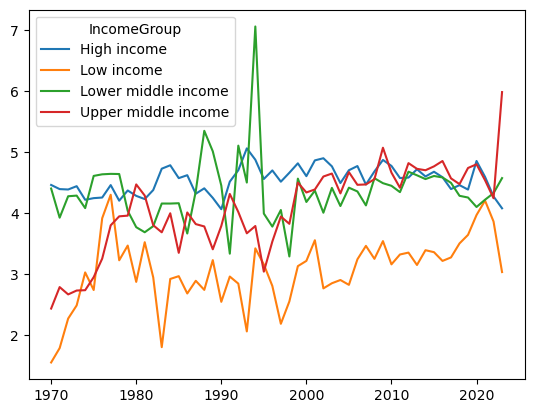

In [210]:
expend_by_income_group = (data_indicator_country_merge.sort_index(level=[0,1], axis='index')
    .loc[(slice(None), slice('SE.XPD.TOTL.GD.ZS', 'SE.XPD.TOTL.GD.ZS')), ['IncomeGroup'] + yrs]
    .groupby('IncomeGroup').mean().T.loc['1970':]
 )
display(expend_by_income_group)
_ = expend_by_income_group.plot(kind='line')
    